#                  RED WINE QUALITY PREDICTION

In [92]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import power_transform
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.isnull().sum()

# There is no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# In target variable there is six values which can be clasified into binary digits.

data['quality']=data['quality'].replace([3,4,5,6,7,8],[0,0,0,1,1,1])

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#                                        Visualisation

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


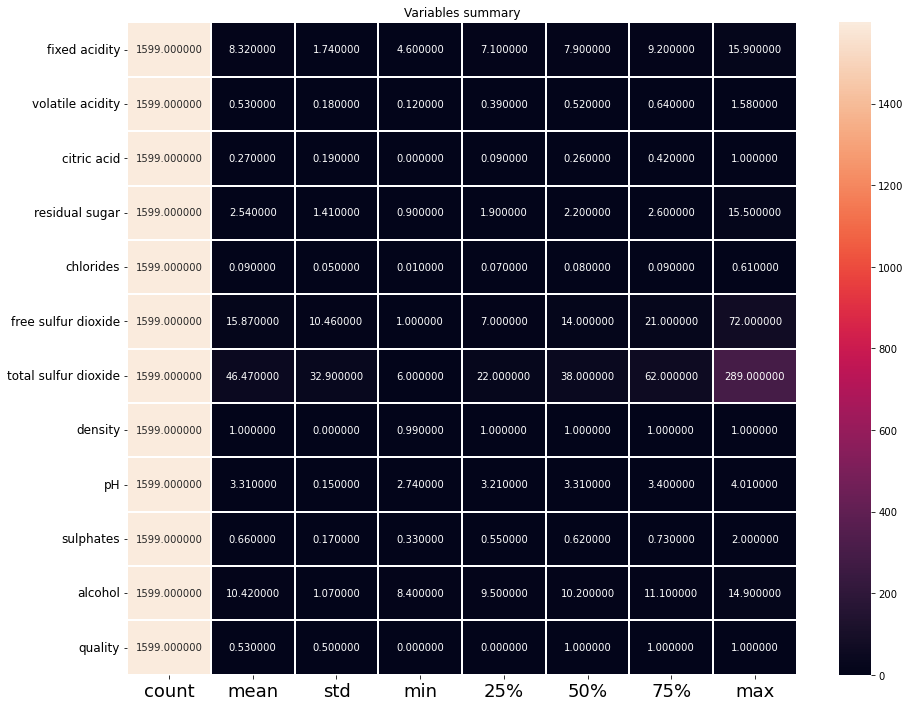

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe().transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

Describe the whole dataset with quality

The number of rows and columns are:
    columns: 12
    rows: 1599 
        
There is no missing value

The mean, std, min and max value of all the feature variable:
    
    fixed acidity:
        Mean: 8.319637
        std:  1.741096
        Minimum: 4.600000
        Maximum: 15.900000
    
    volatile acidity: 
        Mean: 0.527821
        std:  0.179060
        Minimum: 0.120000
        Maximum: 1.580000
    
    citric acid:
        Mean: 0.270976
        std:  0.2194801
        Minimum: 0.000000
        Maximum: 1.000000
    
    residual sugars: 
        Mean: 2.538806
        std:  1.409928
        Minimum: 0.900000
        Maximum: 15.500000
    
    chlorides:
        Mean: 0.087467
        std:  0.047067
        Minimum: 0.012000
        Maximum: 0.611000
    
    free sulphur dioxide: 
        Mean: 15.874922
        std:  10.460157 
        Minimum: 1.000000
        Maximum: 72.000000
    
    total sulphur dioxide:
        Mean: 46.467792
        std:  32.895324
        Minimum: 6.000000
        Maximum: 289.000000
    
    density:
        Mean: 0.996747
        std:  0.001887
        Minimum: 0.990070
        Maximum: 1.003690
    
    pH:
        Mean: 3.311113
        std:  0.154386
        Minimum: 2.740000
        Maximum: 4.010000
    
    sulphates:
        Mean: o.658149
        std:  0.169507
        Minimum: 0.330000
        Maximum: 2.000000
    
    alcohol:
        Mean: 10.422983
        std:  1.065668
        Minimum: 8.400000
        Maximum: 14.900000
    

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 All the columns are of float and integer type, so they all are continuous.

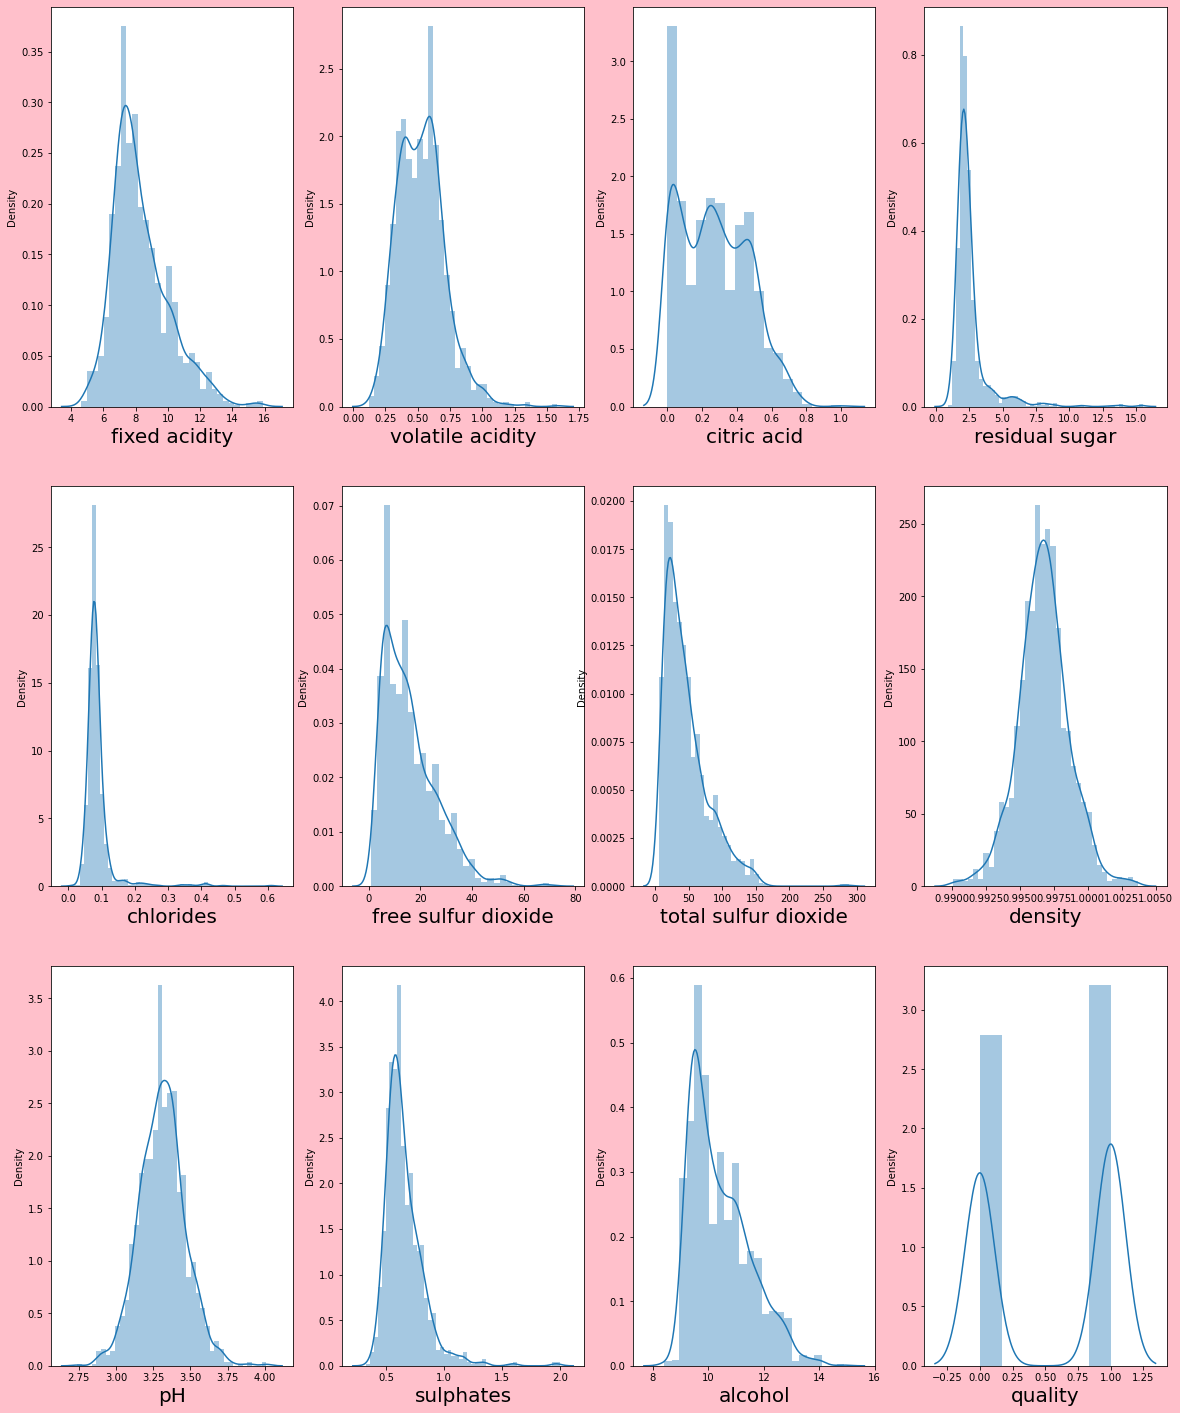

In [10]:
plt.figure(figsize=(20,25),facecolor = 'pink')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

Correlation of the dataset

In [11]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


<AxesSubplot:>

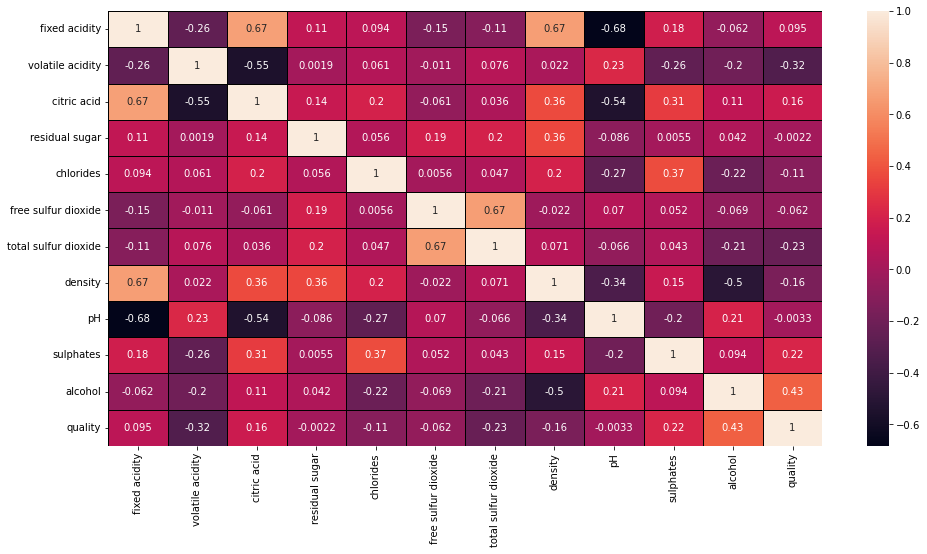

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

In [ ]:
# Valatile acidity, chlorides, free sulphur dioxide, total sulphur dioxide, density and ph are negatively correlated.
# Fixed acidity, citric acid, residual sugar, sulphates and alcohol are positively correlated.

# The correlation b/w input variable and output variable are :
  
    * The fixed acidity has 9% correlation with the output variable which can be considered as good bond.
    * The volatile acidity has 32% correlation with the output variable which can be considered as week bond.
    * The citric acid has 16% correlation with the output variable which can be considered as strong bond.
    * The residual sugar has 0% correlation with the output variable which can be considered as good bond.
    * The chlorides has 11% correlation with the output variable which can be considered as good bond.
    * The free sulphur dioxide has 6% correlation with the output variable which can be considered as good bond.
    * The total sulphur dioxide has 23% correlation with the output variable which can be considered as good bond.
    * The density has 16% correlation with the output variable which can be considered as good bond.
    * The ph has 0% correlation with the output variable which can be considered as good bond.
    * The sulphates has 22% correlation with the output variable which can be considered as strong bond.
    * The alcohol has 43% correlation with the output variable which can be considered as strong bond. 
    
# The higher multicolinearity b/w input variable to another input variable by checking heatmap are:

    * fixed density and density has 67% multicolinearity.
    * Fixed density and citric acid also has 67% multicolinearity.
    * free sulphur dioxide and total sulphur dioxide also has 67% multicolinearity.  

Skewness/outliers worked on continuous data but not on target variable

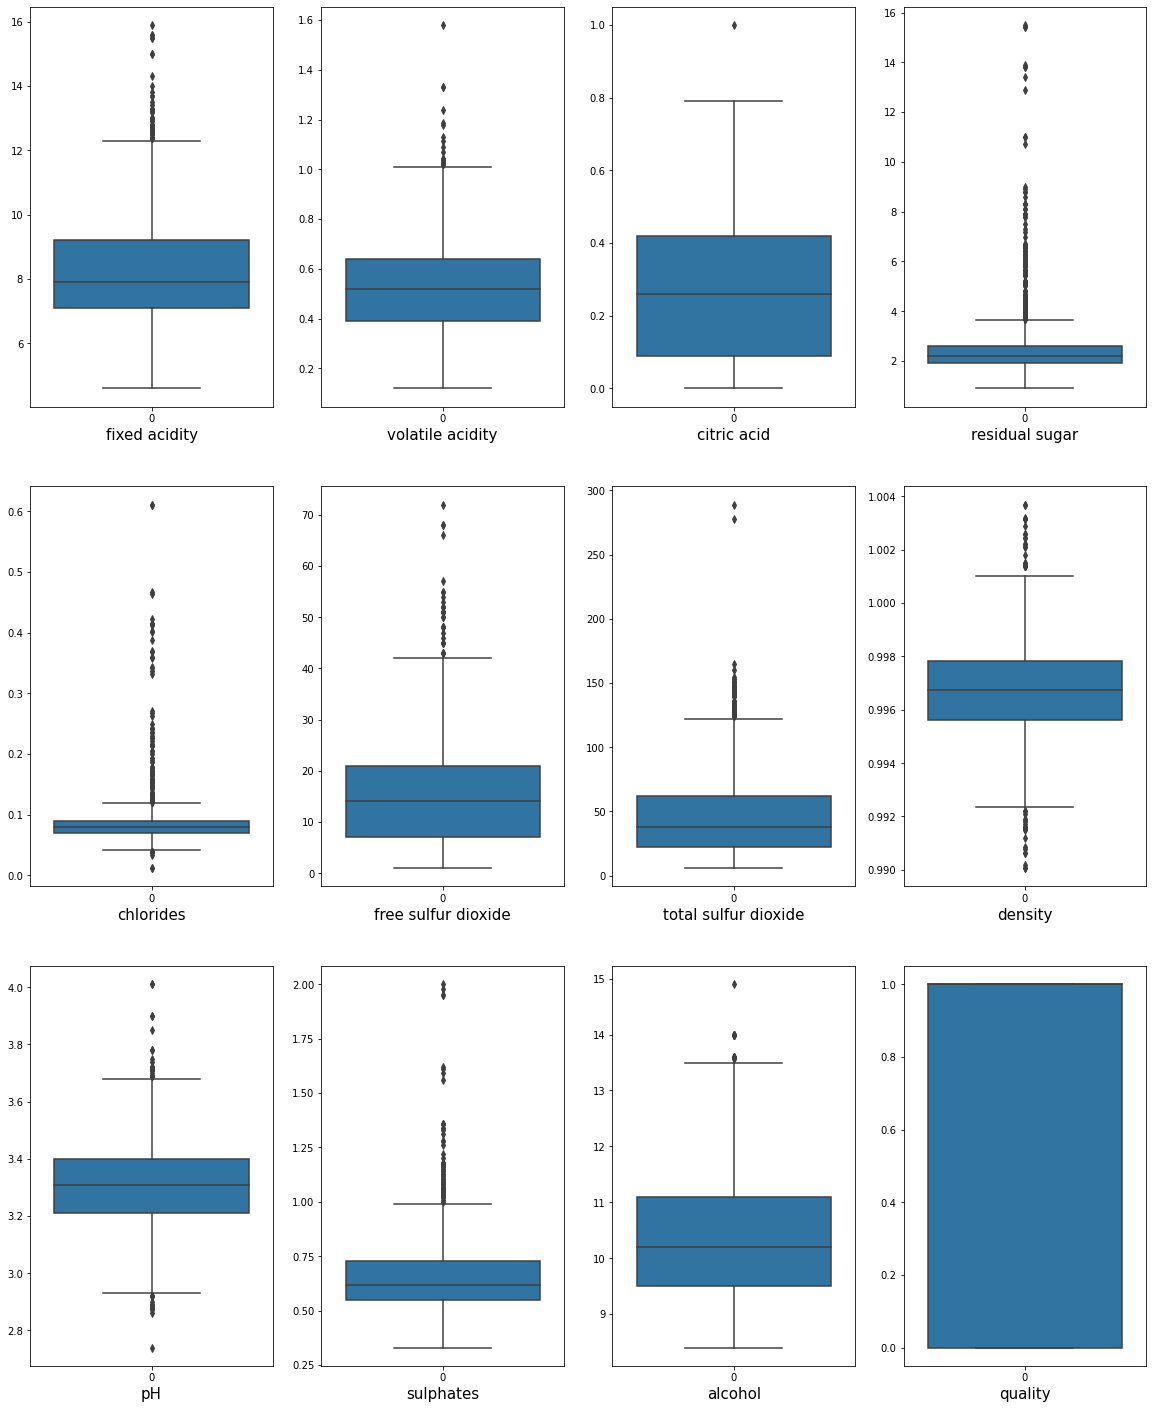

In [13]:
# Check Outliers

plt.figure(figsize=(20,25))
number = 1

for column in data:
    if number <=12:
        plt.subplot(3,4,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

The upper side outliers present in input variables:
    * fixed acidity 
    * volatile acidity 
    * citric acid 
    * residual sugar
    * chloride
    * free sulphur dioxide
    * total sulphur dioxide
    * density
    * ph
    * sulphates
    * alcohol
    
The lower side outliers present in input variables:   
    * density
    * ph


In [14]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

Take threshold for skewness in range(-0.5,0.5)

So we get the input variables
    * fixed acidity
    * volatile acidity
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * sulphates
    * alcohol

Check multicolinearity of an input variable to another input variable by Variance inflation factor

In [15]:
# input variables
x=data.drop(['quality'],axis=1)

# output variable
y=data['quality']

In [16]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


If VIF values are less than 5.That means no multicolinearity.
If  VIF > 5 ,means there is higher relation b/w one feature to another,therefore multicolinearity exist.
The columns are:

   * fixed acidity 
   * density

So, we remove one of the column who have highest vif(ie fixed acidity).

The higher multicolinearity b/w input variable to another input variable by checking heatmap are:

    *fixed density and density has 67% multicolinearity.
    * Fixed density and citric acid also has 67% multicolinearity.
    * free sulphur dioxide and total sulphur dioxide also has 67% multicolinearity.

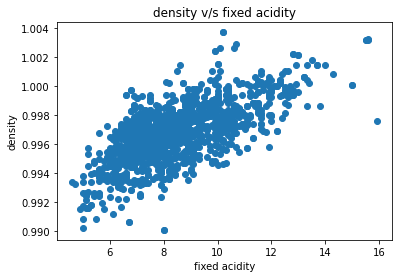

In [18]:
# Multicolinearity b/w fixed density and density

plt.scatter(data['fixed acidity'],data['density'])
plt.xlabel('fixed acidity')
plt.ylabel('density')
plt.title('density v/s fixed acidity')
plt.show()

# Remove fixed acidity column because have less correlation than density

Remove the fixed density column from the dataset

In [19]:
data=data.drop('fixed acidity',axis=1)

divide input and output variable

In [20]:
# Feature variable
x=data.drop(['quality'],axis=1)

# output variable
y=data['quality']

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.784963,volatile acidity
1,2.780557,citric acid
2,1.386375,residual sugar
3,1.401232,chlorides
4,1.939209,free sulfur dioxide
5,2.069396,total sulfur dioxide
6,2.430096,density
7,1.610775,pH
8,1.396382,sulphates
9,2.136067,alcohol


There is no value greater than 5, so there is no multicolinearity

In [23]:
# Remove outliers by z score

z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  258,
        258,  274,  281,  291,  324,  325,  339,  340,  354,  396,  396,
        400,  400,  442,  451,  467,  480,  480,  494,  515,  554,  555,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  672,  672,  684,  690,  692,  692,  695,
        723,  724,  730,  754,  776,  777,  795,  821,  836,  837,  889,
        911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051,
       1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165,
       1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270,
       1270, 1288, 1289, 1295, 1296, 1299, 1300, 1312, 1316, 1319, 1319,
       1321, 1358, 1367, 1370, 1370, 1372, 1372, 1

In [24]:
data_new=data[(z<3).all(axis=1)]

In [25]:
data_new.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [26]:
data_new.shape

(1465, 11)

 Again plot a graph to check the data is normally distributed or not

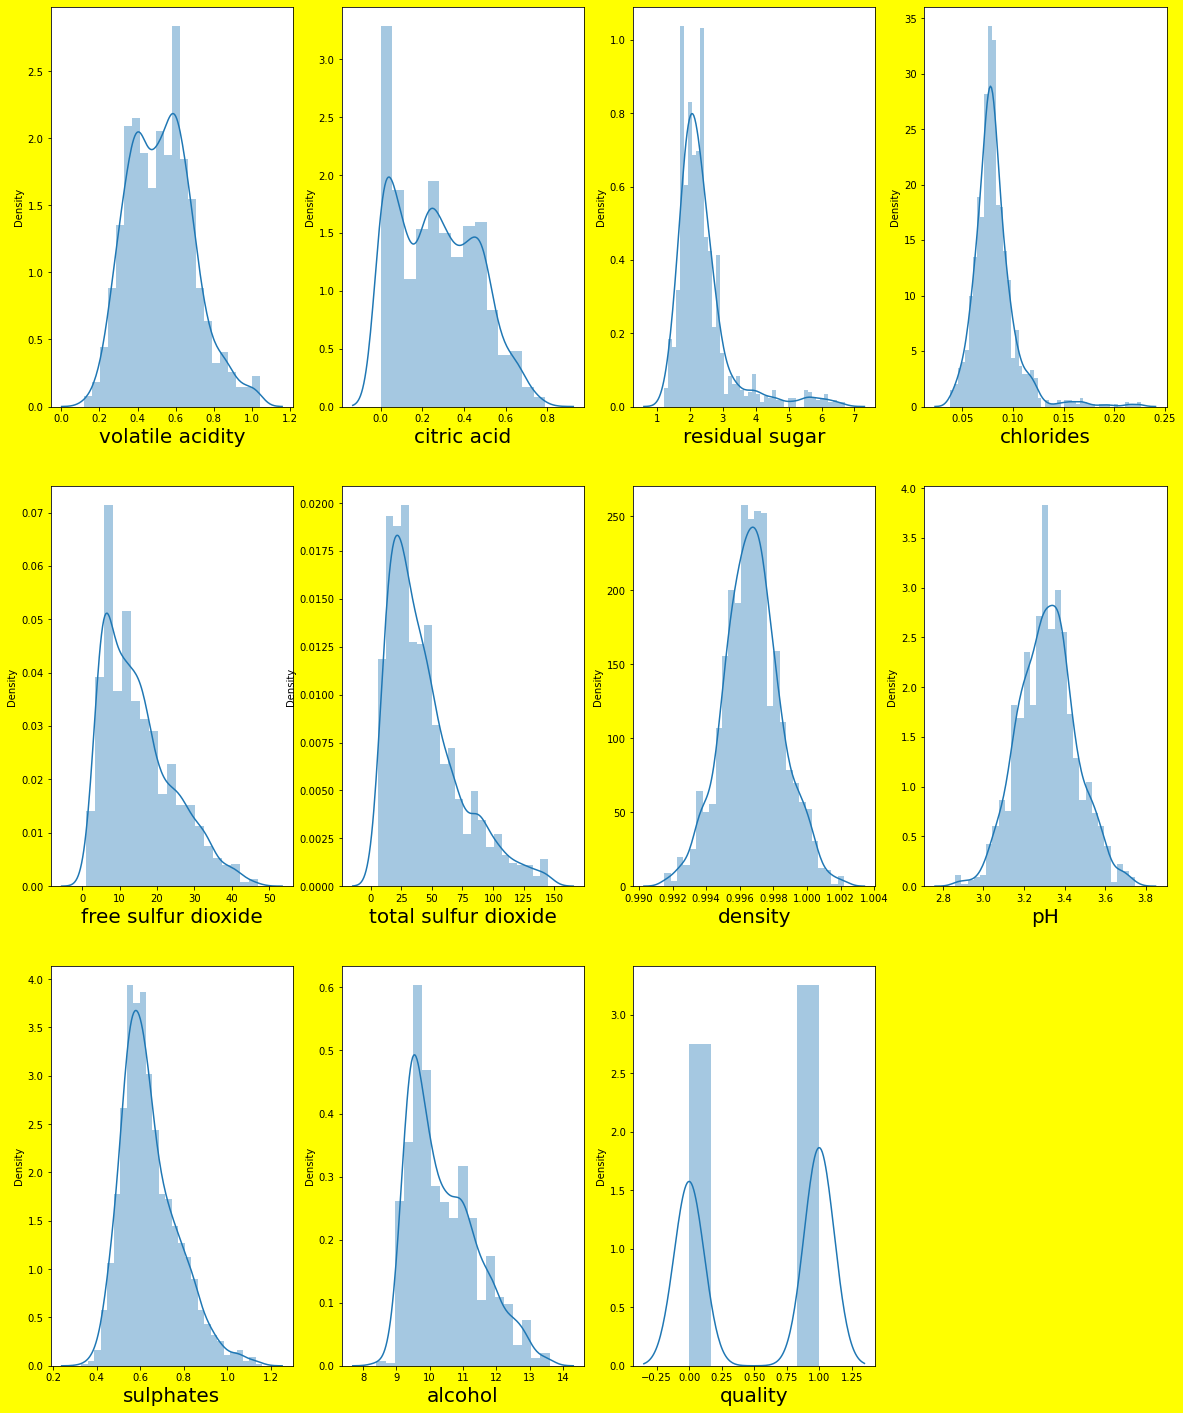

In [27]:
plt.figure(figsize=(20,25),facecolor = 'yellow')
plotnumber = 1

for column in data_new:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data_new[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

In [ ]:
Now data is better than previous 

#                                MODEL TESTING

                                      Logistic Regression

In [28]:
lr=LogisticRegression()

In [29]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The model perform very well")
        print("random state",i)
        print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

The model perform very well
random state 92
Training accuracy score: 74.4
Testing accuracy score: 74.4


The model perform very well
random state 122
Training accuracy score: 74.7
Testing accuracy score: 74.7


The model perform very well
random state 233
Training accuracy score: 74.7
Testing accuracy score: 74.7


The model perform very well
random state 281
Training accuracy score: 74.7
Testing accuracy score: 74.7


The model perform very well
random state 364
Training accuracy score: 74.4
Testing accuracy score: 74.4


The model perform very well
random state 541
Training accuracy score: 74.7
Testing accuracy score: 74.7


The model perform very well
random state 609
Training accuracy score: 74.7
Testing accuracy score: 74.7


The model perform very well
random state 680
Training accuracy score: 74.7
Testing accuracy score: 74.7


The model perform very well
random state 692
Training accuracy score: 75.0
Testing accuracy score: 75.0


The model perform very well
random state 810
Tr

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state= 692) 

In [31]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 75.0


In [32]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[105  35]
 [ 45 135]]


In [33]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       140
           1       0.79      0.75      0.77       180

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [34]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7035826032540676


At cross fold 3 the cv score is 0.7298311444652908


At cross fold 4 the cv score is 0.7298402255639097


At cross fold 5 the cv score is 0.7392163009404389


At cross fold 6 the cv score is 0.7292552542404702


At cross fold 7 the cv score is 0.734300270326471


At cross fold 8 the cv score is 0.7354459798994974


At cross fold 9 the cv score is 0.7392489613971236




In [35]:
lrscore=cross_val_score(lr,x_scaled,y,cv=9)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 73.92489613971236


                                        KNeighbors Classifier

In [36]:
knn= KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 71.875


In [38]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 88  52]
 [ 38 142]]


In [39]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       140
           1       0.73      0.79      0.76       180

    accuracy                           0.72       320
   macro avg       0.72      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320



In [40]:
knnscore=cross_val_score(knn,x_scaled,y,cv=9)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 68.10872003216318


                                  Decision Tree Classifier

In [41]:
clf=DecisionTreeClassifier()

In [42]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 72.8125


In [43]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 92  48]
 [ 39 141]]


In [44]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       140
           1       0.75      0.78      0.76       180

    accuracy                           0.73       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.73      0.73      0.73       320



In [45]:
clfscore=cross_val_score(clf,x_scaled,y,cv=9)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 63.98040584862142


                                 Random Forest Classifier 

In [46]:
rfc=RandomForestClassifier()

In [47]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 80.0


In [48]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[113  27]
 [ 37 143]]


In [49]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       140
           1       0.84      0.79      0.82       180

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [50]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=9)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 72.29875085521628


                                         SVC

In [51]:
svc=SVC()

In [52]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 76.25


In [53]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[111  29]
 [ 47 133]]


In [54]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       140
           1       0.82      0.74      0.78       180

    accuracy                           0.76       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.77      0.76      0.76       320



In [55]:
svcscore=cross_val_score(svc,x_scaled,y,cv=9)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 73.79828886208624


Logistic Regression :
    accuracy score: 75.0
    cv score:       73.92
        
KNNeighbors Classifier:
    accuracy score: 71.87
    cv score:       68.10

Decision Tree Classifier:
    accuracy score: 72.81
    cv score:       63.98
        
Random Forest Classifier:
    accuracy score: 80.00
    cv score:       72.29
        
SV Classifier:
    accuracy score: 76.25
    cv score:       73.79

Logistic Regression and SVC have better accuracy in all of these 5 machine learning model.

Logistic Regression is better in both of them beacuse have less difference in accuracy score and the cv score, so we select it.

#       Modeling of Logistic Regression

Hyper Parameter Tunning:
    Hyper parameter tuning technique is used to increase our accuracy level.

In [84]:
lr=LogisticRegression()

In [85]:
grid_param = {
    'penalty' : ['l1','l2','elasticent','none'],
    'solver'  : ['newton-cg','lbfgs','liblinear','sag'],
    'C'       : [100,10,1.0,0.1,0.01]
}

In [86]:
grid_search = GridSearchCV(estimator=lr,param_grid=grid_param,cv=9,scoring="accuracy",n_jobs=-1)

grid_search.fit(x_train,y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [87]:
clf= LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear')

clf.fit(x_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [88]:
pred = clf.predict(x_test)

ac=accuracy_score(y_test,pred)*100
print("accuracy_score:",ac)

accuracy_score: 75.0


After hyper parameter tuning,it is again giving 75% accuracy value for the model. It means that is the best accuracy value

                                 Plot ROC_AUC curve and find the AUC value

In [96]:
fpr,tpr,thresholds = roc_curve(y_test,pred) 

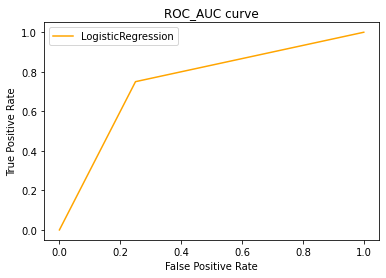

AUC_score 75.0


In [101]:
plt.plot(fpr,tpr,color='orange',label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,pred)*100
print("AUC_score",auc_score)

In [102]:
joblib.dump(best_parameters,"RedWineQuality.pkl")


['RedWineQuality.pkl']

                      Conclusion

In [104]:
Output_data=pd.DataFrame({'Actual data':y_test,"Predicted data":pred})
Output_data

,Actual data,Predicted data
557,0,1
1066,1,1
441,1,1
1171,1,1
1381,0,0
...,...,...
215,0,0
1402,1,1
970,1,1
840,1,1
